<a href="https://colab.research.google.com/github/josefinasolisb/project2/blob/main/Project2_Part4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset

Wagner,Dennis, Heider,D., and Hattab,Georges. (2023). Secondary Mushroom. UCI Machine Learning Repository. https://doi.org/10.24432/C5FP5Q.



In [2]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#EDA

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Coding Dojo/Project_2/secondary_data.csv',delimiter=';')
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

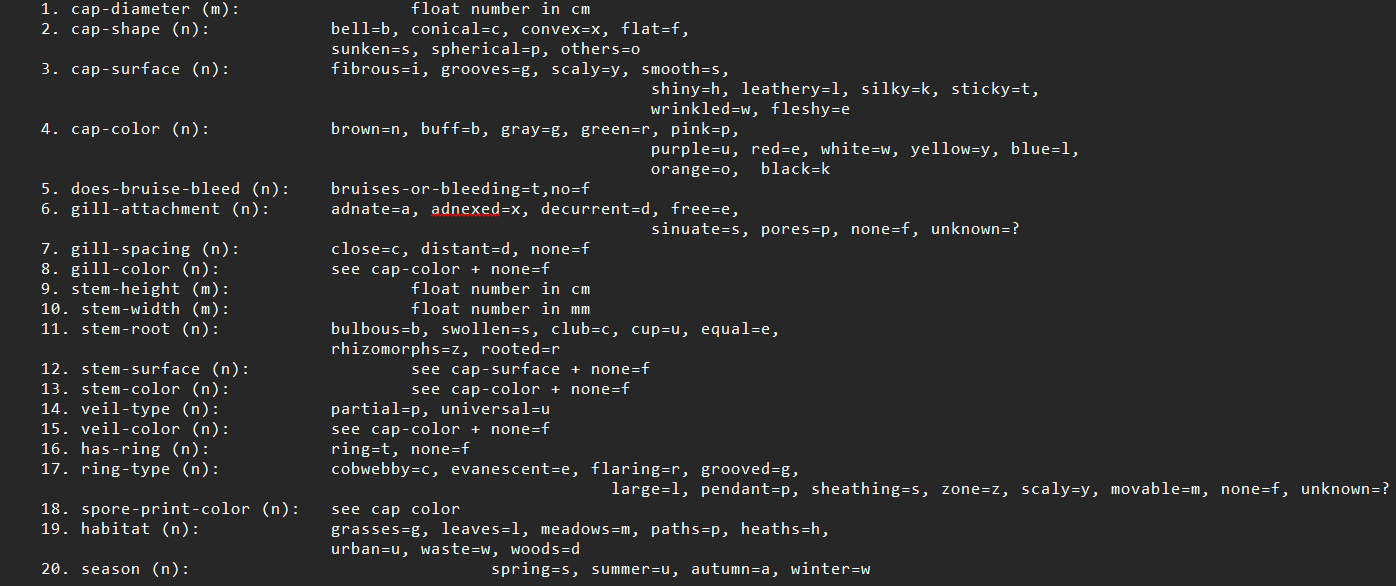

In [5]:
df.duplicated().sum()

146

In [6]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9855
gill-spacing            25062
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51536
stem-surface            38122
stem-color                  0
veil-type               57746
veil-color              53510
has-ring                    0
ring-type                2471
spore-print-color       54597
habitat                     0
season                      0
dtype: int64

Con esta informacion podemos darnos cuentas con facilidad que hay columnas con una gran cantidad de datos faltantes. Especificamente las columnas 'stem-root', 'veil-type', 'veil-color' y 'spore-print-color' tienen mas de 50 mil datos faltantes, lo que representa mas del 80% de valores desconocidos. Lo mas conveniente es eliminar estas columnas ya que no se cuenta con informacion suficiente para poder imputarlos y al ser tantos, es probable que se introduzca ruido en el conjunto de datos distorsionando los resultados del modelo de machine learning.

In [8]:
null_percent = df.isnull().mean() * 100

# Definir el umbral para eliminar columnas (60%)
threshold = 60

# Identificar columnas con mas de 60% de valores nulos
columns_drop = null_percent[null_percent > threshold].index

# Eliminar columnas
df.drop(columns=columns_drop, inplace=True)
df.isnull().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9855
gill-spacing            25062
gill-color                  0
stem-height                 0
stem-width                  0
stem-color                  0
has-ring                    0
ring-type                2471
habitat                     0
season                      0
dtype: int64

<ipython-input-9-90f95ec77350>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=axes[i], palette='Blues')
<ipython-input-9-90f95ec77350>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=axes[i], palette='Blues')
<ipython-input-9-90f95ec77350>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=axes[i], palette='Blues')
<ipython-input-9-90f95ec77350>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable

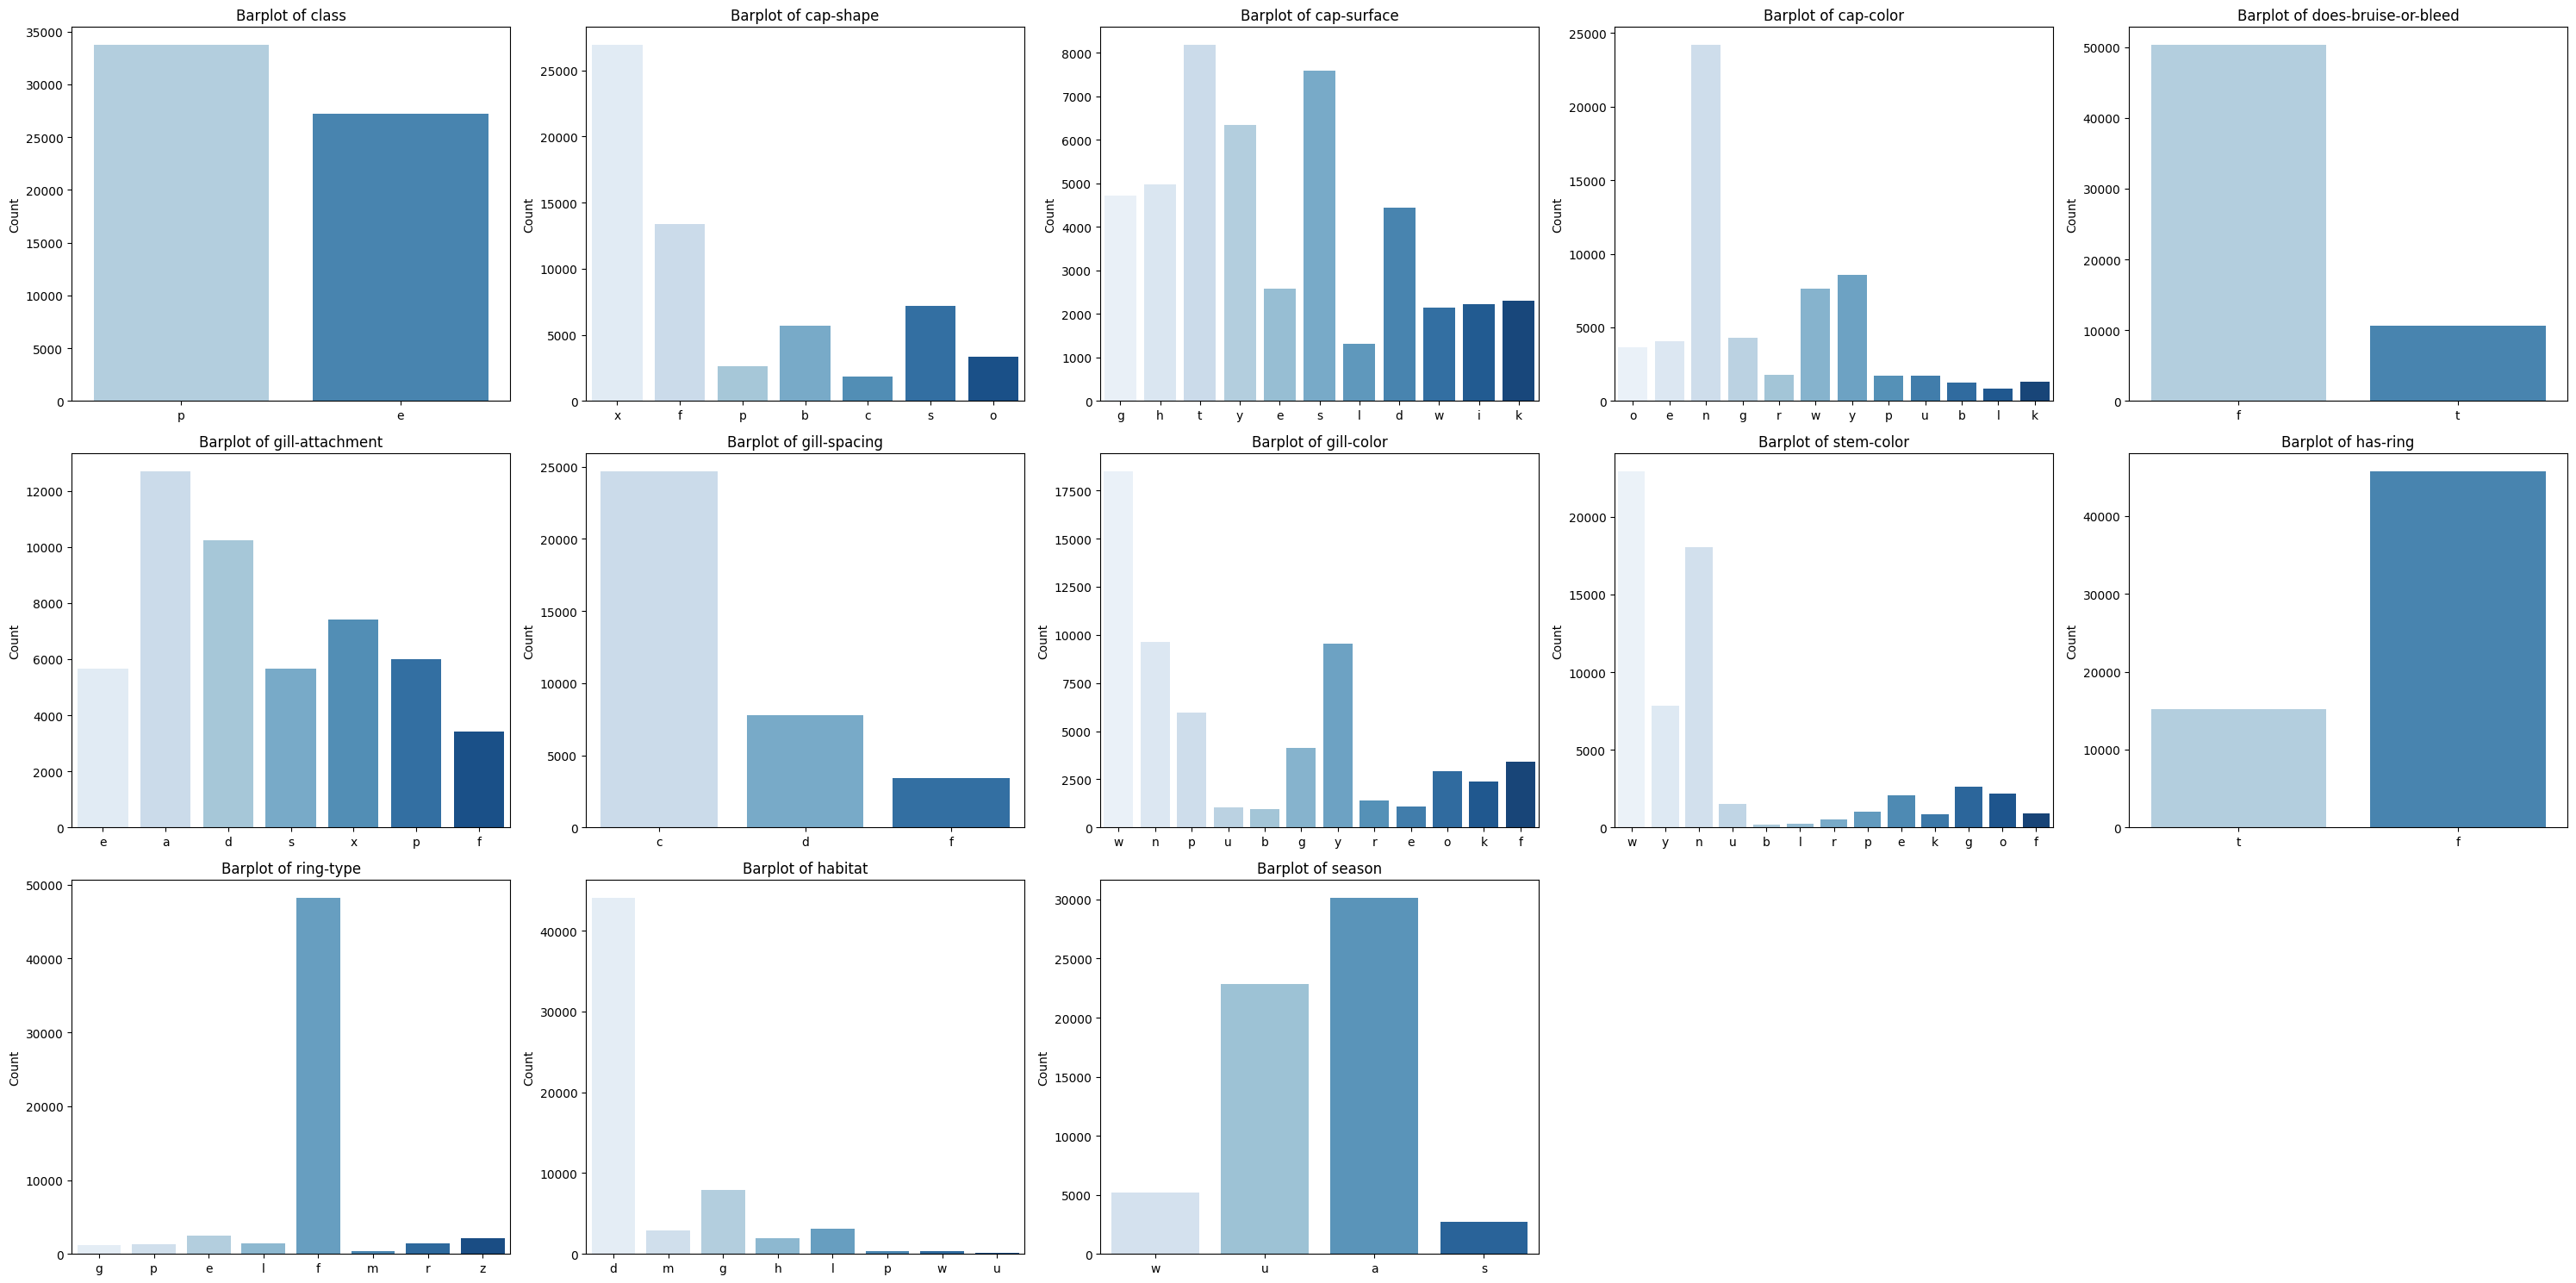

In [9]:
# Lista de columnas categóricas
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Crear una cuadrícula para los gráficos de las columnas
n_cols = 5
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 5 * n_rows))

# Aplana el arreglo de ejes para facilitar la iteración
axes = axes.flatten()

# Crear los gráficos
for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df, ax=axes[i], palette='Blues')
    axes[i].set_title(f'Barplot of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Elimina cualquier subgráfico no utilizado
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**La variable objetivo es 'class**', para clasificar si los hongos son comestibles o venenosos. Donde 'p' = venenoso y 'e' = comestible. En el primer grafico se puede ver que la mayoria son venenosos.


En la mayoria de graficos se ve que en la dispersion de los datos suele haber una variable predominante. Unicamnete en 'cap-surface'y 'gill-attachment' hay una distribucion variada, casi "homogenea para los datos.  

La columna 'ring-type' contiene datos faltantes y la 'f' representa 'none'. En pasos posteriores se tranformaran los datos faltantes en 'f' para las columnas donde el diccionario de datos considere como 'f' a los datos faltantes.

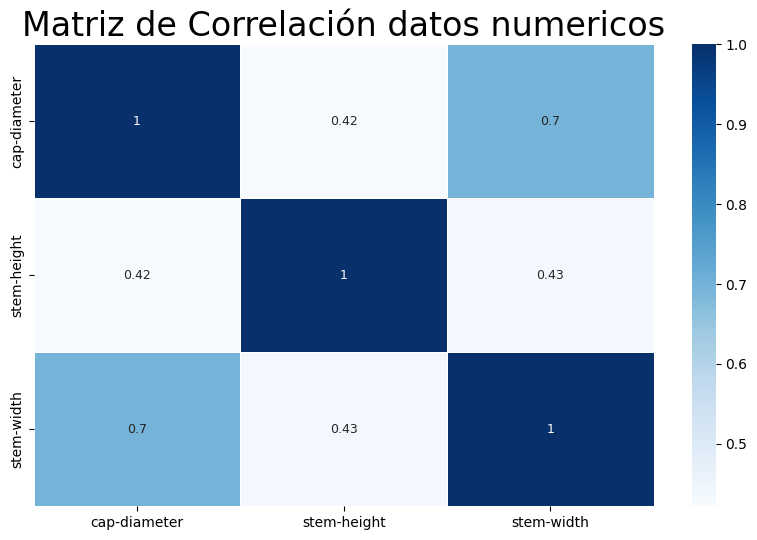

In [10]:
numeric_vars = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_vars.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', linewidths=0.5, annot_kws={"fontsize":9})
plt.title('Matriz de Correlación datos numericos', fontsize=24)
plt.show()

Segun el mapa de correlacion, existe una correlacion semi alta entre 'cap-diameter' y 'stem-width' con un valor de 0.7. Esto puede ser a que el ancho del tallo esta en funcion al diametro de este.

In [11]:
def unique_values(df):
    sorted_unique_values = {}
    for column_name in df.columns:
        if pd.api.types.is_numeric_dtype(df[column_name]):
            sorted_values = sorted(df[column_name].dropna().unique())
        else:
            sorted_values = sorted(df[column_name].astype(str).unique())
        sorted_unique_values[column_name] = sorted_values
    return sorted_unique_values

#Imprimir los valores unicos por columna
unique_values_dict = unique_values(df)
for column, values in unique_values_dict.items():
    print(f"{column}: {values}")

class: ['e', 'p']
cap-diameter: [0.38, 0.44, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1, 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3, 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4, 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5, 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.6, 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7, 1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8, 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9, 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.0, 2.01, 2.02, 2.03, 2.04, 2.05, 2.06, 2.07, 2.08,

Observando estos datos, se identificó que no tiene mucho sentido tener altura y ancho del tallo con valor 0. Hay dos opciones para abordar este problema:
1. Eliminar las filas donde hay valores 0
2. Convertir los 0 a 'Nan' e imputarlos

La segunda opcion implica introducir errores en el conjunto de datos por lo que se elegirá la primera opcion. En caso las metricas de los modelos de clasificacion sean malos, existe la posibilidad de regresar a este punto y utilizar la opcion 2 para tratar los datos.

In [12]:
# Eliminar las filas donde hay valores 0 en las columnas numericas.
df = df[(df != 0).all(axis=1)]

In [13]:
df.loc[:, 'class'] = df['class'].map({'p': 1, 'e': 0})

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60008 entries, 0 to 61068
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 60008 non-null  object 
 1   cap-diameter          60008 non-null  float64
 2   cap-shape             60008 non-null  object 
 3   cap-surface           45888 non-null  object 
 4   cap-color             60008 non-null  object 
 5   does-bruise-or-bleed  60008 non-null  object 
 6   gill-attachment       50478 non-null  object 
 7   gill-spacing          34946 non-null  object 
 8   gill-color            60008 non-null  object 
 9   stem-height           60008 non-null  float64
 10  stem-width            60008 non-null  float64
 11  stem-color            60008 non-null  object 
 12  has-ring              60008 non-null  object 
 13  ring-type             57537 non-null  object 
 14  habitat               60008 non-null  object 
 15  season                60

Como se menciono anteriormente y como se puede ver en el diccionario de datos, se considera que en algunas columnas los valores 'none' tengan el valor 'f'. Luego de revisar esto, las columnas 'cap-surface', 'gill-attachment', 'gill-spacing' y 'ring-type'  se completaran con 'f'.  

In [15]:
df = df.fillna('f')

In [16]:
df.isnull().sum()

class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

# Pre procesamiento

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector

In [18]:
y = df['class']
X = df.drop(columns = 'class')

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [20]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), make_column_selector(dtype_include='number')),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse=False), make_column_selector(dtype_include='object'))
    ]
)
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ea0168912a0>),
                                ('cat',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ea016890ee0>)])

# Modelamiento


### Verificacion del preprocesamiento

In [21]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [22]:
num_features = X_train.select_dtypes(include=['number']).columns
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(X_train.select_dtypes(include=['object']).columns)
all_features = list(num_features) + list(cat_features)

In [23]:
X_train_processed_df = pd.DataFrame(X_train_processed, columns=all_features)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=all_features)

num_columns_train = X_train_processed_df.shape
num_columns_test = X_test_processed_df.shape
print("Número de columnas X train procesadas:", num_columns_train)
print("Número de columnas X test procesadas:", num_columns_test)

Número de columnas X train procesadas: (45006, 92)
Número de columnas X test procesadas: (15002, 92)


Se calcularon los valores usando el pipeline preprocessor para verificar que los tamaños entre train y test coincidan, a pesar de que luego se volvera a usar 'preprocessor' en el pipeline para la evaluacion de cada modelo de clasificacion.

### Pruebas de 4 modelos

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [25]:
#Modelo 1: KNN
pipeline_knn = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier())
])
pipeline_knn.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ea0168912a0>),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ea016890ee0>)])),
                ('knn', KNeighborsClassifier())])

In [26]:
# Modelo 2: Logistic Regression
pipeline_lg = Pipeline([
    ('preprocessor', preprocessor),
    ('lg', LogisticRegression())
])
pipeline_lg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ea0168912a0>),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ea016890ee0>)])),
                ('lg', LogisticRegression())])

In [27]:
# Modelo 3: Decision Tree
pipeline_tree = Pipeline([
    ('preprocessor', preprocessor),
    ('tree', DecisionTreeClassifier())
])
pipeline_tree.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ea0168912a0>),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ea016890ee0>)])),
                ('tree', DecisionTreeClassifier())])

In [28]:
# Modelo 4: Random Forest
pipeline_forest = Pipeline([
    ('preprocessor', preprocessor),
    ('forest', RandomForestClassifier())
])
pipeline_forest.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ea0168912a0>),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ea016890ee0>)])),
                ('forest', RandomForestClassifier())])

### Metricas

In [29]:
from sklearn.metrics import (accuracy_score, recall_score, precision_score, f1_score,
                             roc_auc_score, confusion_matrix)

In [30]:
def evaluate_model(model_pipe, X_train, y_train, X_test, y_test):
  # Get predictions
  y_pred_train = model_pipe.predict(X_train)
  y_pred_test = model_pipe.predict(X_test)

  # Accuracy
  train_accuracy = accuracy_score(y_train, y_pred_train).round(2)
  test_accuracy = accuracy_score(y_test, y_pred_test).round(2)

  print('Train Accuracy:', train_accuracy)
  print('Test Accuracy:', test_accuracy)
  print()

  # Recall
  train_recall = recall_score(y_train, y_pred_train).round(2)
  test_recall = recall_score(y_test, y_pred_test).round(2)

  print('Train Sensitivity:', train_recall)
  print('Test Sensitivity:', test_recall)
  print()

  # Precision
  train_precision = precision_score(y_train, y_pred_train).round(2)
  test_precision = precision_score(y_test, y_pred_test).round(2)

  print('Train Precision:', train_precision)
  print('Test Precision:', test_precision)
  print()

  # Specificity
  train_conf_matrix = confusion_matrix(y_train, y_pred_train)
  tn_train, fp_train, fn_train, tp_train = train_conf_matrix.ravel()
  specificity_train = tn_train / (tn_train + fp_train)

  test_conf_matrix = confusion_matrix(y_test, y_pred_test)
  tn_test, fp_test, fn_test, tp_test = test_conf_matrix.ravel()
  specificity_test = tn_test / (tn_test + fp_test)

  print("Train Specificity:", round(specificity_train, 2))
  print("Test Specificity:", round(specificity_test, 2))
  print()

 # F1
  train_F1 = f1_score(y_train, y_pred_train).round(2)
  test_F1 = f1_score(y_test, y_pred_test).round(2)

  print('Train F1:', train_F1)
  print('Test F1:', test_F1)
  print()


  # AUC
  y_pred_proba_train = model_pipe.predict_proba(X_train)
  y_pred_proba_test = model_pipe.predict_proba(X_test)
  train_roc_auc = roc_auc_score(y_train, y_pred_proba_train[:,1]).round(2)
  test_roc_auc = roc_auc_score(y_test, y_pred_proba_test[:,1]).round(2)

  print('Train AUC:', train_roc_auc)
  print('Test AUC:', test_roc_auc)
  print()

In [31]:
print('KNN:')
evaluate_model(pipeline_knn, X_train, y_train, X_test, y_test)
print('Logistic regression:')
evaluate_model(pipeline_lg, X_train, y_train, X_test, y_test)
print('Decision Tree Classifier:')
evaluate_model(pipeline_tree, X_train, y_train, X_test, y_test)
print('Random Forest Classifier:')
evaluate_model(pipeline_forest, X_train, y_train, X_test, y_test)

KNN:
Train Accuracy: 1.0
Test Accuracy: 1.0

Train Sensitivity: 1.0
Test Sensitivity: 1.0

Train Precision: 1.0
Test Precision: 1.0

Train Specificity: 1.0
Test Specificity: 1.0

Train F1: 1.0
Test F1: 1.0

Train AUC: 1.0
Test AUC: 1.0

Logistic regression:
Train Accuracy: 0.77
Test Accuracy: 0.77

Train Sensitivity: 0.79
Test Sensitivity: 0.78

Train Precision: 0.8
Test Precision: 0.79

Train Specificity: 0.75
Test Specificity: 0.76

Train F1: 0.79
Test F1: 0.79

Train AUC: 0.86
Test AUC: 0.85

Decision Tree Classifier:
Train Accuracy: 1.0
Test Accuracy: 1.0

Train Sensitivity: 1.0
Test Sensitivity: 1.0

Train Precision: 1.0
Test Precision: 1.0

Train Specificity: 1.0
Test Specificity: 1.0

Train F1: 1.0
Test F1: 1.0

Train AUC: 1.0
Test AUC: 1.0

Random Forest Classifier:
Train Accuracy: 1.0
Test Accuracy: 1.0

Train Sensitivity: 1.0
Test Sensitivity: 1.0

Train Precision: 1.0
Test Precision: 1.0

Train Specificity: 1.0
Test Specificity: 1.0

Train F1: 1.0
Test F1: 1.0

Train AUC: 1.

Se observa que las metricas para KNN, Decision Tree y Random Forest dan una precisión de 1 en el conjunto de entrenamiento y de prueba. Esto indica que estos modelos están sobreajustados.

### Ajuste de hiperparametros

In [32]:
from sklearn.model_selection import RandomizedSearchCV
# Dividir los datos en muestras mas pequenas para el ajuste de hiperprametros
X_train_sample, X_discard, y_train_sample, y_discard = train_test_split(X_train, y_train, train_size=0.2, random_state=42)

In [33]:
# Busqueda hiperparámetros KNN
params_knn = {
    'knn__n_neighbors': [3, 5, 7, 10],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]
}

rs_knn = RandomizedSearchCV(pipeline_knn, params_knn, cv=5, n_iter=10, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV on the sample data
rs_knn.fit(X_train_sample, y_train_sample)

# Print best parameters and mean cross-validation score
print("Best parameters for KNN:", rs_knn.best_params_)
print("Mean cross-validation score for KNN:", rs_knn.best_score_.round(3))

Best parameters for KNN: {'knn__weights': 'distance', 'knn__p': 2, 'knn__n_neighbors': 7}
Mean cross-validation score for KNN: 0.999


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [34]:
# Busqueda hiperparámetros Logistic Regression
params_lg = {
    'lg__C': [0.01, 0.1, 1, 10, 100],
    'lg__solver': ['lbfgs', 'liblinear']
}

rs_lg = RandomizedSearchCV(pipeline_lg, params_lg, cv=5, n_iter=10, random_state=42, n_jobs=-1, error_score='raise')

rs_lg.fit(X_train_sample, y_train_sample)

print("Best parameters for Logistic Regression:", rs_lg.best_params_)
print("Mean cross-validation score for Logistic Regression:", rs_lg.best_score_.round(3))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Best parameters for Logistic Regression: {'lg__solver': 'lbfgs', 'lg__C': 100}
Mean cross-validation score for Logistic Regression: 0.775


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
# Busqueda hiperparámetros Decision Tree
params_tree = {
    'tree__max_depth': [None, 10, 20, 30],
    'tree__min_samples_split': [2, 5, 10],
    'tree__min_samples_leaf': [1, 2, 4]
}

rs_tree = RandomizedSearchCV(pipeline_tree, params_tree, cv=5, n_iter=10, random_state=42, n_jobs=-1)

rs_tree.fit(X_train_sample, y_train_sample)

print("Best parameters for Decision Tree:", rs_tree.best_params_)
print("Mean cross-validation score for Decision Tree:", rs_tree.best_score_.round(3))

Best parameters for Decision Tree: {'tree__min_samples_split': 5, 'tree__min_samples_leaf': 2, 'tree__max_depth': 30}
Mean cross-validation score for Decision Tree: 0.985


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [36]:
# Busqueda hiperparámetros Random Forest
params_forest = {
    'forest__n_estimators': [100, 150],
    'forest__max_depth': [None, 10, 20],
    'forest__min_samples_split': [2, 5],
    'forest__min_samples_leaf': [1, 2]
}

rs_forest = RandomizedSearchCV(pipeline_forest, params_forest, cv=5, n_iter=10, random_state=42, n_jobs=-1)

rs_forest.fit(X_train_sample, y_train_sample)

print("Best parameters for Random Forest:", rs_forest.best_params_)
print("Mean cross-validation score for Random Forest:", rs_forest.best_score_.round(3))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Best parameters for Random Forest: {'forest__n_estimators': 100, 'forest__min_samples_split': 2, 'forest__min_samples_leaf': 1, 'forest__max_depth': None}
Mean cross-validation score for Random Forest: 1.0


In [37]:
#Modelo 1.1: KNN_optimo
pipeline_knn_optimo = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier(
        n_neighbors=7,
        weights='distance',
        p=2))
])
pipeline_knn_optimo.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ea0168912a0>),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ea016890ee0>)])),
                ('knn',
                 KNeighborsClassifier(n_neighbors=7, weights='distance'))])

In [38]:
# Modelo 2.1: LogisticRegression_optimo
pipeline_lg_optimo = Pipeline([
    ('preprocessor', preprocessor),
    ('lg', LogisticRegression(
        solver='lbfgs',
        C=100,
        penalty='l2'
))
])
pipeline_lg_optimo.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ea0168912a0>),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ea016890ee0>)])),
                ('lg', LogisticRegression(C=100))])

In [39]:
# Modelo 3.1: DecisionTree_optimo
pipeline_tree_optimo = Pipeline([
    ('preprocessor', preprocessor),
    ('tree', DecisionTreeClassifier(
        min_samples_split=2,
        min_samples_leaf=2,
        max_depth=20))
])
pipeline_tree_optimo.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ea0168912a0>),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ea016890ee0>)])),
                ('tree',
                 DecisionTreeClassifier(max_depth=20, min_samples_leaf=2))])

In [40]:
# Modelo 4.1: RandomForest_optimo
pipeline_forest_optimo = Pipeline([
    ('preprocessor', preprocessor),
    ('forest', RandomForestClassifier(
        n_estimators=100,
        min_samples_split=2,
        min_samples_leaf=1,
        max_depth=None))
])
pipeline_forest_optimo.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ea0168912a0>),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ea016890ee0>)])),
                ('forest', RandomForestClassifier())])

In [41]:
print('KNN_optimo:')
evaluate_model(pipeline_knn_optimo, X_train, y_train, X_test, y_test)
print('Logistic regression_optimo:')
evaluate_model(pipeline_lg_optimo, X_train, y_train, X_test, y_test)
print('Decision Tree Classifier_optimo:')
evaluate_model(pipeline_tree_optimo, X_train, y_train, X_test, y_test)
print('Random Forest Classifier_optimo:')
evaluate_model(pipeline_forest_optimo, X_train, y_train, X_test, y_test)

KNN_optimo:
Train Accuracy: 1.0
Test Accuracy: 1.0

Train Sensitivity: 1.0
Test Sensitivity: 1.0

Train Precision: 1.0
Test Precision: 1.0

Train Specificity: 1.0
Test Specificity: 1.0

Train F1: 1.0
Test F1: 1.0

Train AUC: 1.0
Test AUC: 1.0

Logistic regression_optimo:
Train Accuracy: 0.77
Test Accuracy: 0.77

Train Sensitivity: 0.79
Test Sensitivity: 0.78

Train Precision: 0.8
Test Precision: 0.79

Train Specificity: 0.75
Test Specificity: 0.76

Train F1: 0.79
Test F1: 0.79

Train AUC: 0.86
Test AUC: 0.85

Decision Tree Classifier_optimo:
Train Accuracy: 1.0
Test Accuracy: 1.0

Train Sensitivity: 0.99
Test Sensitivity: 0.99

Train Precision: 1.0
Test Precision: 1.0

Train Specificity: 1.0
Test Specificity: 1.0

Train F1: 1.0
Test F1: 1.0

Train AUC: 1.0
Test AUC: 1.0

Random Forest Classifier_optimo:
Train Accuracy: 1.0
Test Accuracy: 1.0

Train Sensitivity: 1.0
Test Sensitivity: 1.0

Train Precision: 1.0
Test Precision: 1.0

Train Specificity: 1.0
Test Specificity: 1.0

Train F1: 1

###Eleccion de modelo

Modelo de Regresión Logística:

Este modelo muestra métricas más realistas y razonables con una precisión de 0.77 y un AUC de 0.85 en los datos de prueba.
Las métricas son consistentes entre entrenamiento y prueba, lo que sugiere un buen equilibrio entre sesgo y varianza.


El modelo de Regresión Logística es la opción más realista a pesar de que los otros modelos muestran métricas perfectas. Las metricas "perfectas" con valor 1 son irreales y podrian ser a causa de un sobreajuste.

Recomendación:
* Es recomendable revisar los datos y procedimientos de procesamientos para asegurar que no haya fuga de datos ni otros problemas que puedan haber causado las métricas perfectas en los otros modelos.
* Especificamnete es recomendable usar el 'Modelo 2.1: LogisticRegression_optimo' ya que al tener los hiperparametros ajustados permite la reproducibilidad, muestra optimizacion documentada y es considerada una "buena practica" dentro del desarrollo de modelos de calsificacion en python.
